
# Credit Card Fraud Detection using Keras

This notebook demonstrates a binary classification task where we aim to detect fraudulent credit card transactions using a neural network built with **Keras**. The dataset is highly imbalanced, and proper evaluation metrics such as **precision, recall, F1-score**, and **AUC-ROC** are crucial to assess the model.

---

### Key Steps:
1. Data Preprocessing and Balancing
2. Neural Network Architecture using Keras
3. Model Training and Evaluation


# 💳 Credit Card Fraud Detection using Keras

---

## 📊 Dataset Description

This dataset contains credit card transactions made by European cardholders in September 2013. It includes **284,807 transactions**, out of which only **492 are fraudulent** — making it highly **imbalanced** (fraud cases ~0.172%).

All features are **numerical**, transformed using **PCA**, except for:
- `Time`: Seconds elapsed since the first transaction
- `Amount`: Transaction amount
- `Class`: Target variable (1 = Fraud, 0 = Genuine)

---

## 🧠 Project Overview

In this project, I implemented a **fraud detection model using Keras (TensorFlow backend)**, along with other ML classifiers. The model was trained to detect fraudulent activities using key techniques such as:
- Precision-Recall AUC for imbalanced data
- F1 Score for better balance between precision and recall
- Confusion matrix, ROC, and other evaluation metrics

The objective is to **maximize fraud detection accuracy** while minimizing false positives, especially in a scenario with highly skewed data.

---

## 📬 Contact Information

**👨‍💻 Ritesh Kaushik**  
📧 Email: ritesh18043@gmail.com   
🔗 [LinkedIn](https://www.linkedin.com/in/riteshkaushik18/)  
💻 [GitHub](https://github.com/riteshkaushikbr)

---


In [32]:
# 📚 Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🧠 TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

# 🧪 Sklearn Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


## Exploratory Data Analysis (EDA)

In [33]:
# Read data
df = pd.read_csv(r"C:\Users\rites\Downloads\archive\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [35]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [36]:
# View which columns are categorical
df.describe().select_dtypes(exclude=['int', 'float']).columns

Index([], dtype='object')

In [37]:
#check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [38]:
# How many rows are in our dataset?
len(df)

284807

In [39]:
# How many columns are in our dataset?
len(df.columns)

31

In [40]:
df.shape

(284807, 31)

In [41]:
# print fraud transaction details
print (df.Time[df.Class == 1].describe())

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


In [42]:
# print normal transaction details
print (df.Time[df.Class == 0].describe())

count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


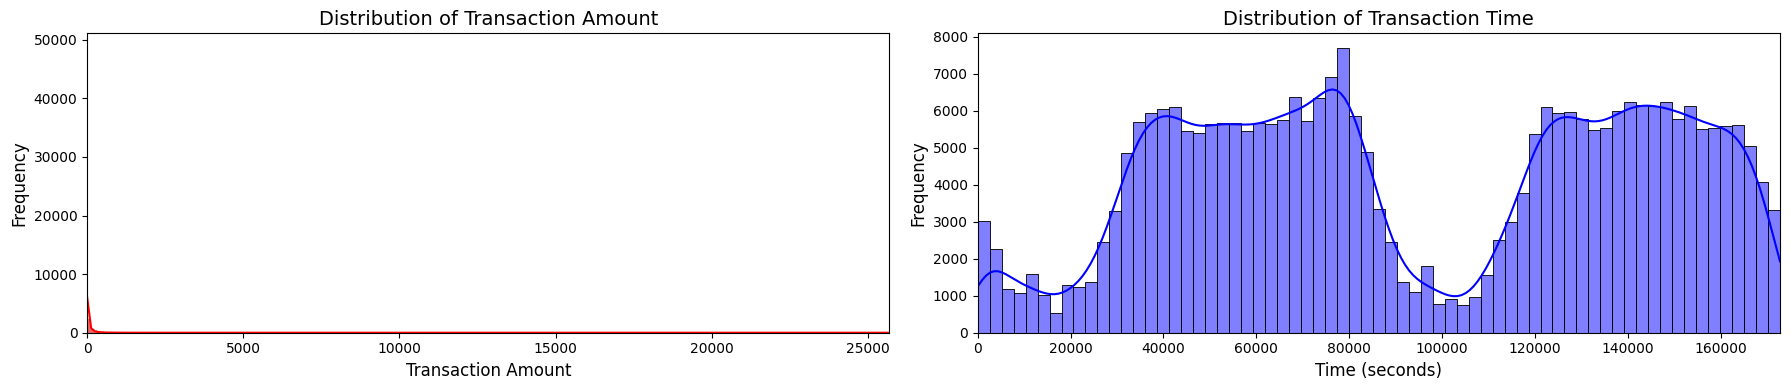

In [43]:
# Prepare the values
amount_val = df['Amount'].values
time_val = df['Time'].values

# Set up the subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Plot distribution for Amount
sns.histplot(amount_val, ax=ax[0], kde=True, color='red')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlabel('Transaction Amount', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)
ax[0].set_xlim([min(amount_val), max(amount_val)])

# Plot distribution for Time
sns.histplot(time_val, ax=ax[1], kde=True, color='blue')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlabel('Time (seconds)', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.tight_layout()
plt.show()


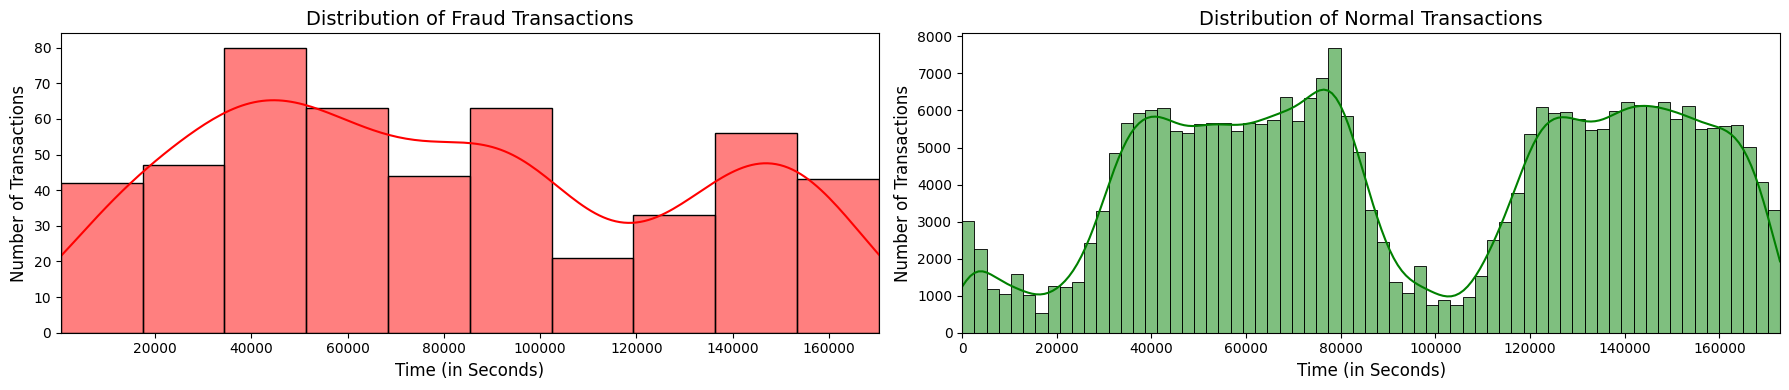

In [44]:
# Separate time values by class
fraud_val = df.Time[df.Class == 1]
normal_val = df.Time[df.Class == 0]

# Set up subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Fraud transactions
sns.histplot(fraud_val, ax=ax[0], kde=True, color='red')
ax[0].set_title('Distribution of Fraud Transactions', fontsize=14)
ax[0].set_xlabel('Time (in Seconds)', fontsize=12)
ax[0].set_ylabel('Number of Transactions', fontsize=12)
ax[0].set_xlim([min(fraud_val), max(fraud_val)])

# Normal transactions
sns.histplot(normal_val, ax=ax[1], kde=True, color='green')
ax[1].set_title('Distribution of Normal Transactions', fontsize=14)
ax[1].set_xlabel('Time (in Seconds)', fontsize=12)
ax[1].set_ylabel('Number of Transactions', fontsize=12)
ax[1].set_xlim([min(normal_val), max(normal_val)])

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate amount values by class
fraud_amt = df.Amount[df.Class == 1]
normal_amt = df.Amount[df.Class == 0]

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Fraud amount distribution
sns.histplot(fraud_amt, ax=ax[0], kde=True, color='red')
ax[0].set_title('Distribution of Fraud Transactions', fontsize=14)
ax[0].set_xlabel('Amount ($)', fontsize=12)
ax[0].set_ylabel('Number of Transactions', fontsize=12)
ax[0].set_xlim([min(fraud_amt), max(fraud_amt)])

# Normal amount distribution
sns.histplot(normal_amt, ax=ax[1], kde=True, color='green')
ax[1].set_title('Distribution of Normal Transactions', fontsize=14)
ax[1].set_xlabel('Amount ($)', fontsize=12)
ax[1].set_ylabel('Number of Transactions', fontsize=12)
ax[1].set_xlim([min(normal_amt), max(normal_amt)])

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
ax = sns.scatterplot(data=df,x= df.Time[df.Class == 1], y= df.Amount[df.Class == 1], color='red')
ax.set_title('Distribution of Fraud Transactions', fontsize=14)

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount ($)')
plt.show()

In [ ]:
ax = sns.scatterplot(data=df,x= df.Time[df.Class == 0], y= df.Amount[df.Class == 0], color='green')
ax.set_title('Distribution of Normal Transactions', fontsize=14)

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount ($)')
plt.show()

In [ ]:
# Shuffle the entire data set (applies to both train & test)
df = df.sample(frac=1).reset_index(drop=True)
x= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [ ]:
print(x[:3])

In [ ]:
print(y[:3])

# Creating train and test data

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

n_inputs = x_train.shape[1]

model = Sequential([
    Input(shape=(n_inputs,)),
    Dense(n_inputs, activation='relu'),
    Dense(30, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

# creating scaler object for encoding
scaler = StandardScaler()
# applying StandardScaler on x_train and x_test
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model Creation

In [ ]:
n_inputs = x_train.shape[1]

model = Sequential([
    Dense(n_inputs, activation=tf.nn.relu,
                       input_shape=(n_inputs,)),
    Dense(30, activation=tf.nn.relu),
    Dense(2, activation=tf.nn.softmax)
])

model.compile(optimizer=Adam(lr=0.001), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])       

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
model.summary()

In [ ]:
model.fit(x_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

# Model Evaluation

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)
print('PR AUC: %.3f' % auc_score)

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC %.3f' % roc_auc)

In [ ]:
f1 = f1_score(y_test, y_pred)
print('F1 Score %.3f' % f1)


---

## 🧾 Model Performance Summary

The performance of our Keras-based binary classifier can be summarized using the following key metrics:

- **Accuracy**: This indicates the overall correctness but may be misleading due to class imbalance.
- **Precision**: The proportion of predicted frauds that were actually frauds.
- **Recall** (Sensitivity): The proportion of actual frauds that were correctly identified.
- **F1-Score**: Harmonic mean of precision and recall.
- **AUC-ROC**: Measures the ability of the model to distinguish between classes. A higher value (closer to 1) indicates a better model.

### ⚠️ Key Insight:
Due to the **severe imbalance** in the dataset, accuracy alone is not sufficient. The model must be judged based on **recall** (to catch as many frauds as possible) and **precision** (to avoid too many false alarms).

